In [22]:
#uploading the dataset and summary of data
import pandas as pd
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
filename = next(iter(uploaded))

# Read the dataset into a pandas DataFrame
df = pd.read_csv(filename)

# Print the summary of the dataset
summary = df.describe()
print(summary)


Saving resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv to resale-flat-prices-based-on-registration-date-from-jan-2017-onwards (2).csv
       floor_area_sqm  lease_commence_date  resale_price
count   134168.000000        134168.000000  1.341680e+05
mean        97.765356          1995.325487  4.706689e+05
std         24.098741            13.602076  1.629509e+05
min         31.000000          1966.000000  1.400000e+05
25%         82.000000          1985.000000  3.500000e+05
50%         94.000000          1996.000000  4.400000e+05
75%        113.000000          2006.000000  5.550000e+05
max        249.000000          2019.000000  1.418000e+06


In [24]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [25]:
import pandas as pd
#Deleting unnecessary columns
# List of columns to delete
columns_to_delete = ['block', 'remaining_lease', 'street_name']

# Delete the specified columns
df = df.drop(columns_to_delete, axis=1)

# Verify the updated DataFrame
print(df.head())


     month        town flat_type storey_range  floor_area_sqm      flat_model  \
0  2017-01  ANG MO KIO    2 ROOM     10 TO 12            44.0        Improved   
1  2017-01  ANG MO KIO    3 ROOM     01 TO 03            67.0  New Generation   
2  2017-01  ANG MO KIO    3 ROOM     01 TO 03            67.0  New Generation   
3  2017-01  ANG MO KIO    3 ROOM     04 TO 06            68.0  New Generation   
4  2017-01  ANG MO KIO    3 ROOM     01 TO 03            67.0  New Generation   

   lease_commence_date  resale_price  
0                 1979      232000.0  
1                 1978      250000.0  
2                 1980      262000.0  
3                 1980      265000.0  
4                 1980      265000.0  


In [27]:
#Encoding the month column
import pandas as pd
from datetime import datetime
# Extract the month and convert it to numerical format
df['month'] = pd.to_datetime(df['month']).dt.month

# Verify the updated DataFrame
print(df['month'])


0         1
1         1
2         1
3         1
4         1
         ..
134163    8
134164    8
134165    8
134166    8
134167    8
Name: month, Length: 134168, dtype: int64


Summary for column 'month':
count    134168.000000
mean          6.512984
std           3.336709
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64



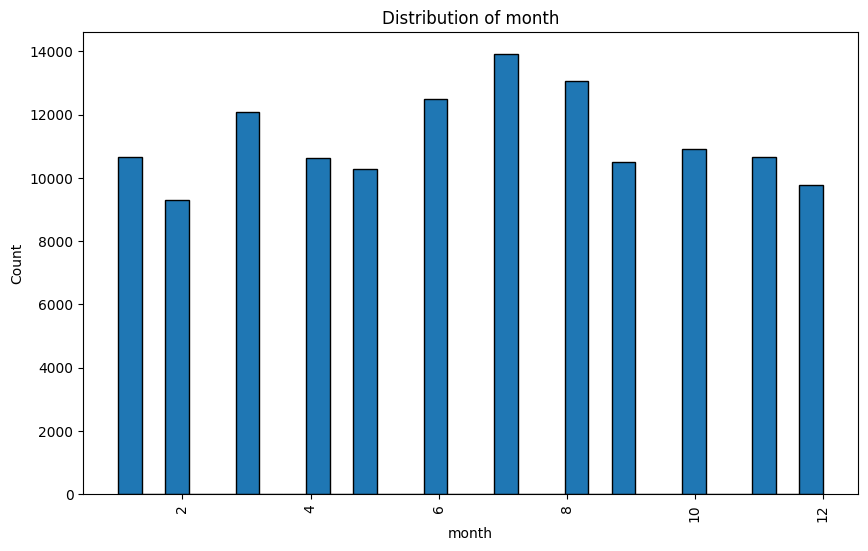

Summary for column 'town':
count       134168
unique          26
top       SENGKANG
freq         11439
Name: town, dtype: object



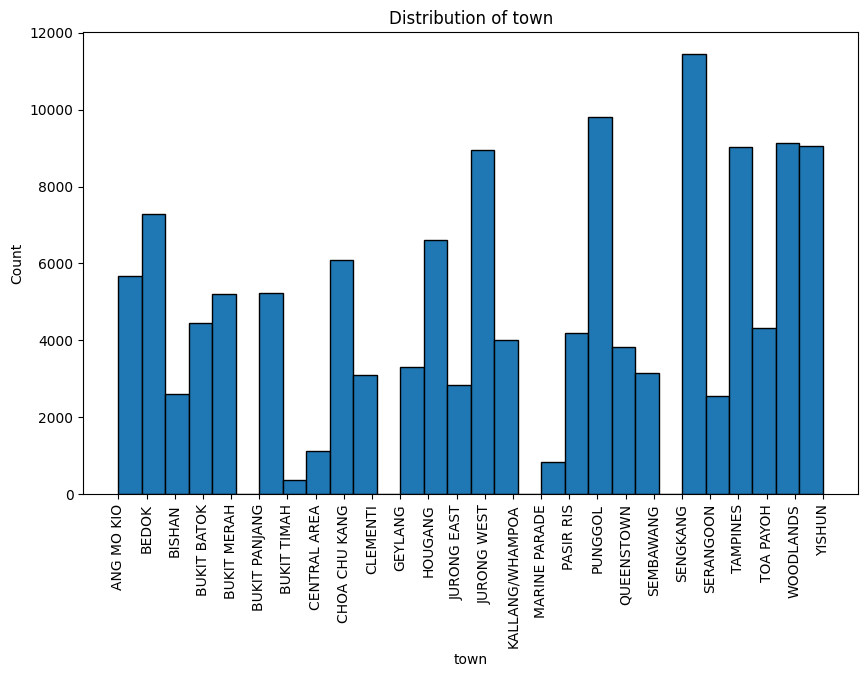

Summary for column 'flat_type':
count     134168
unique         7
top       4 ROOM
freq       55974
Name: flat_type, dtype: object



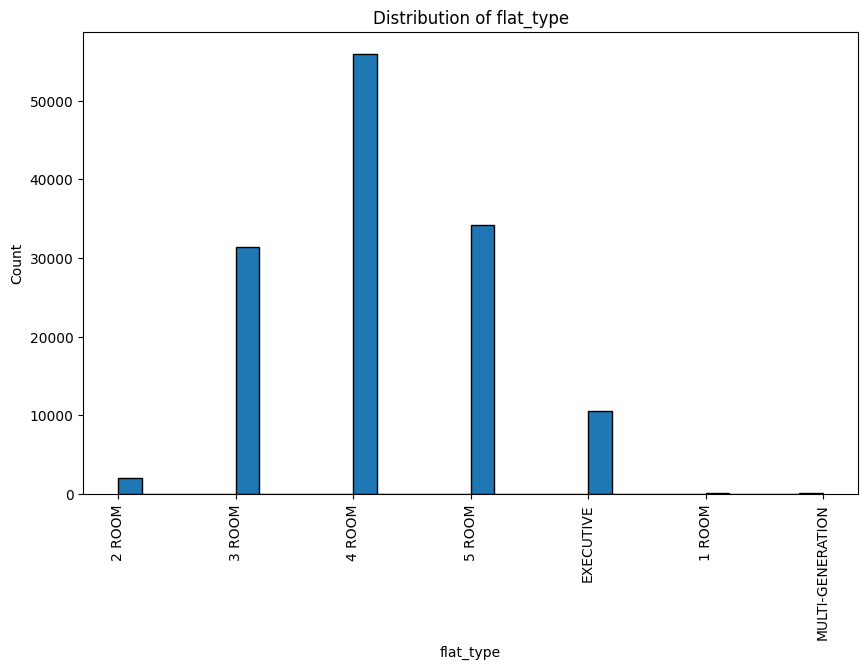

Summary for column 'storey_range':
count       134168
unique          17
top       04 TO 06
freq         30879
Name: storey_range, dtype: object



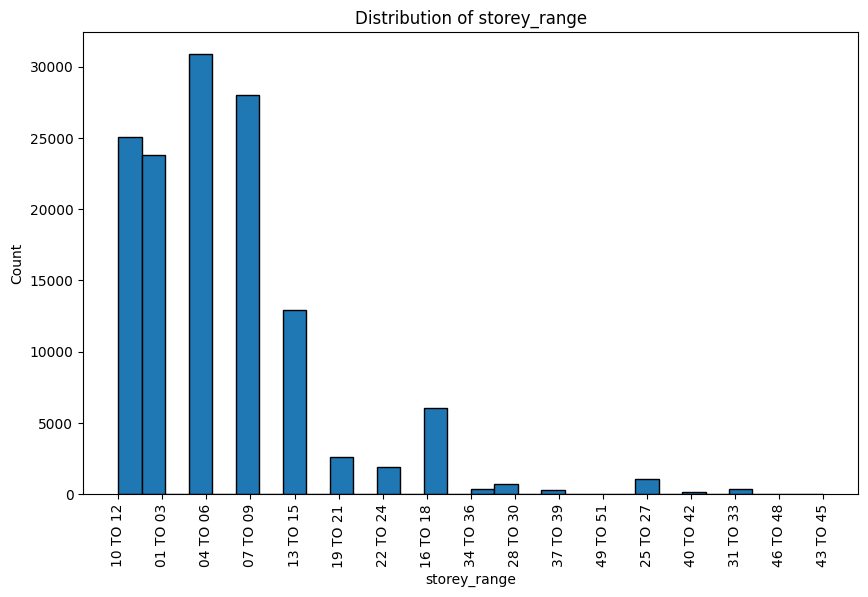

Summary for column 'floor_area_sqm':
count    134168.000000
mean         97.765356
std          24.098741
min          31.000000
25%          82.000000
50%          94.000000
75%         113.000000
max         249.000000
Name: floor_area_sqm, dtype: float64



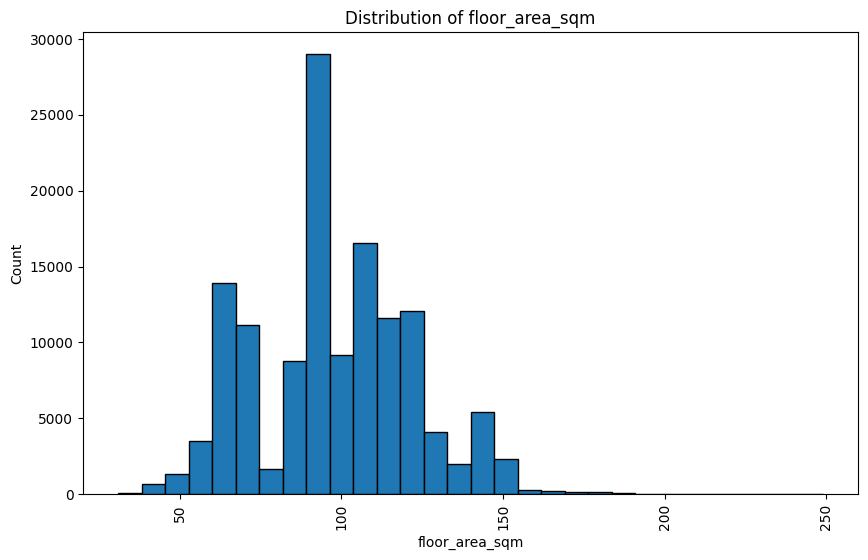

Summary for column 'flat_model':
count      134168
unique         21
top       Model A
freq        44442
Name: flat_model, dtype: object



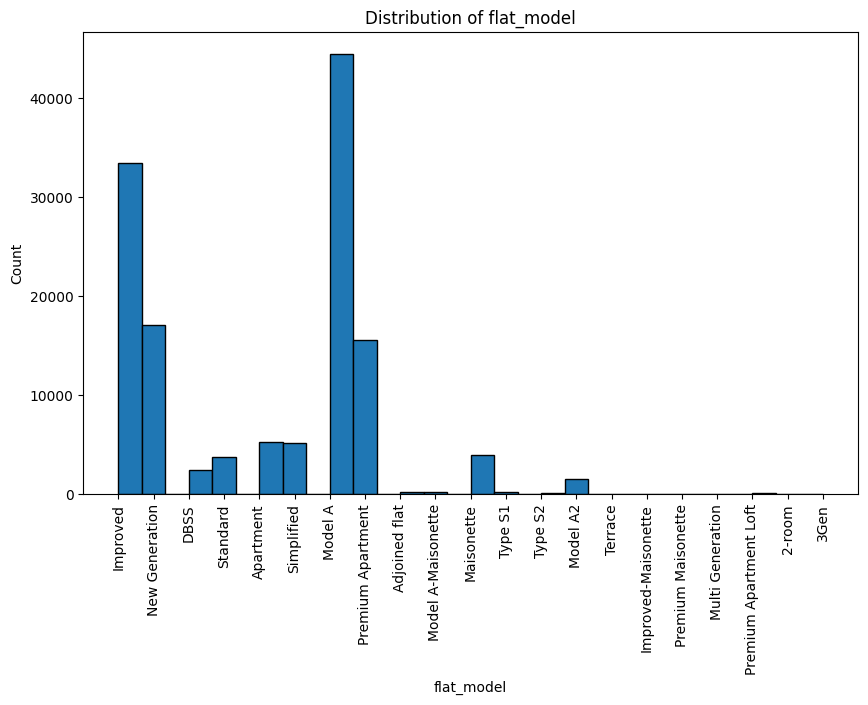

Summary for column 'lease_commence_date':
count    134168.000000
mean       1995.325487
std          13.602076
min        1966.000000
25%        1985.000000
50%        1996.000000
75%        2006.000000
max        2019.000000
Name: lease_commence_date, dtype: float64



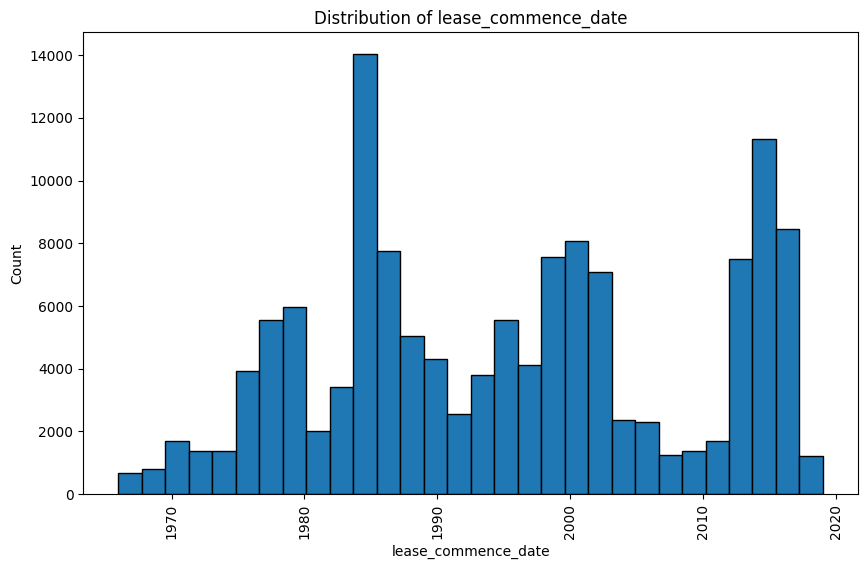

Summary for column 'resale_price':
count    1.341680e+05
mean     4.706689e+05
std      1.629509e+05
min      1.400000e+05
25%      3.500000e+05
50%      4.400000e+05
75%      5.550000e+05
max      1.418000e+06
Name: resale_price, dtype: float64



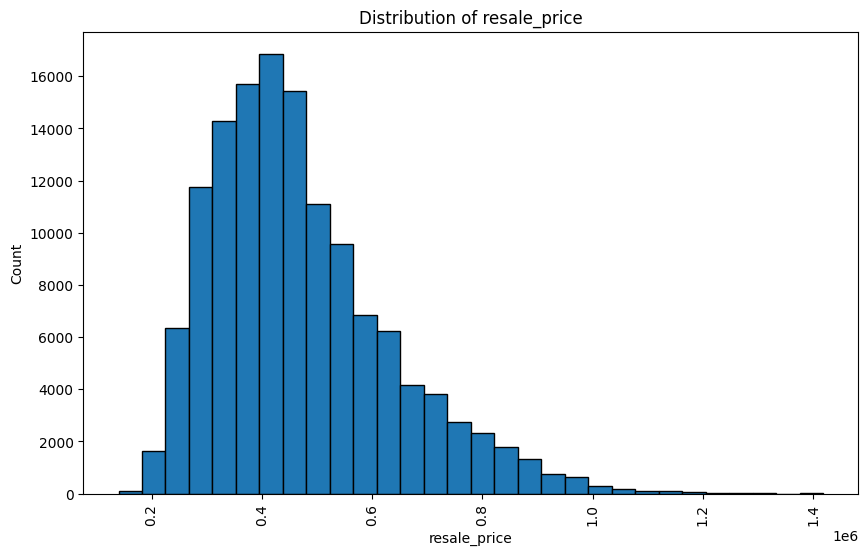

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Perform exploratory data analysis on each column
for column in df.columns:

    # Summary statistics
    summary = df[column].describe()
    print(f"Summary for column '{column}':\n{summary}\n")

    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.show()




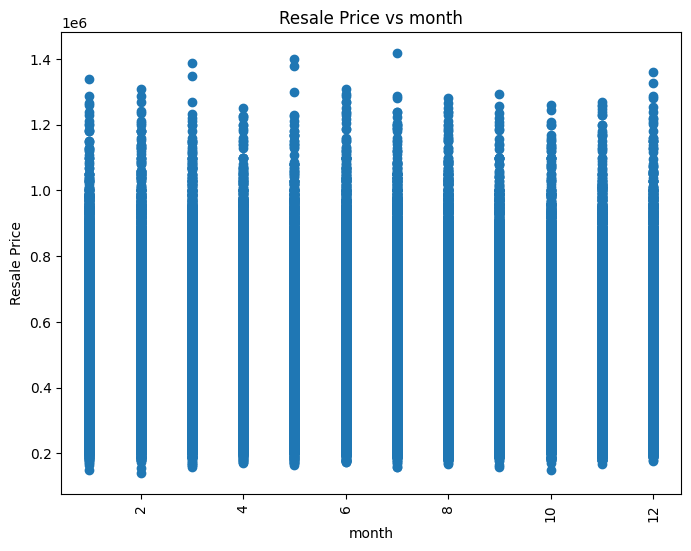

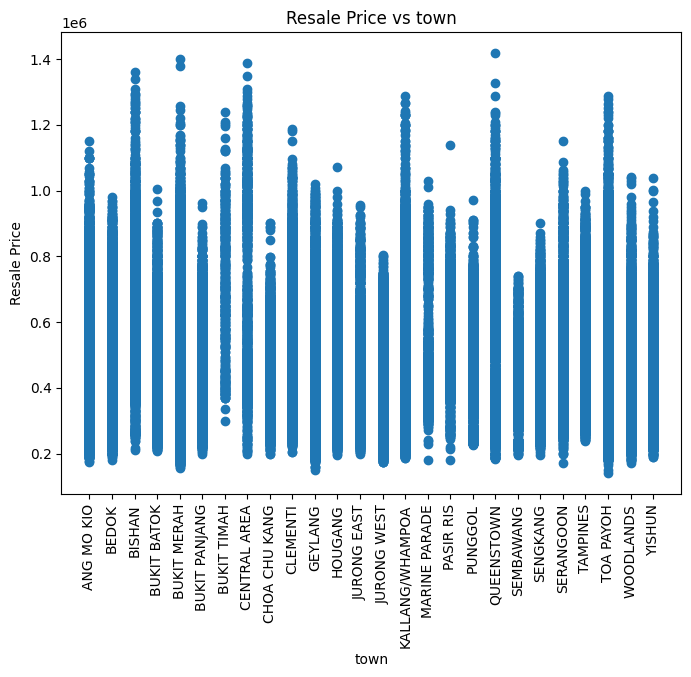

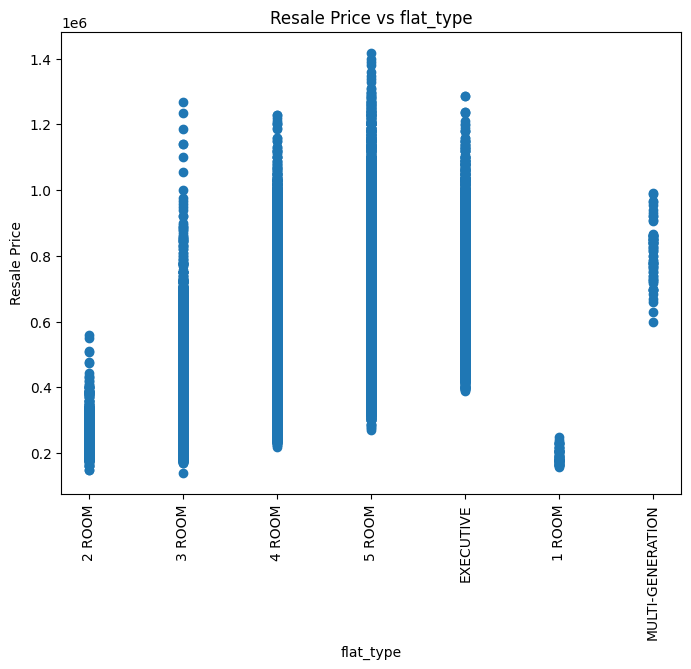

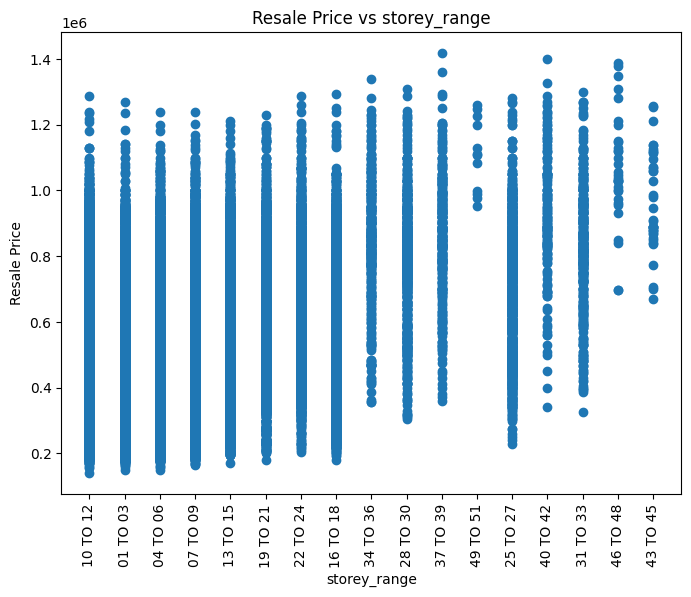

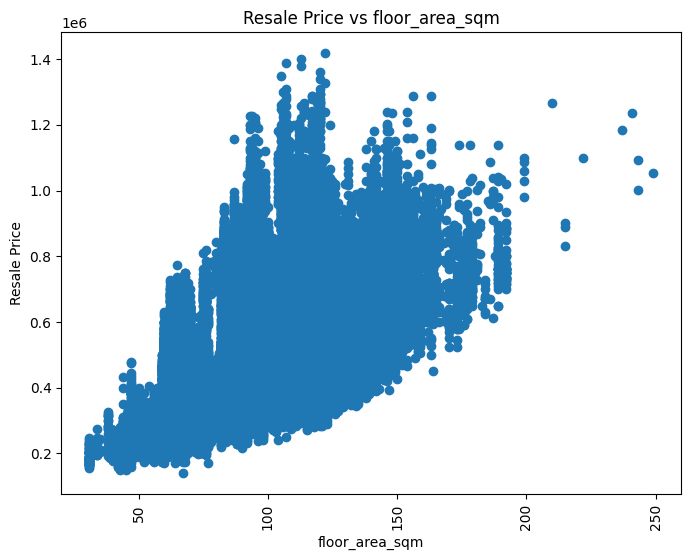

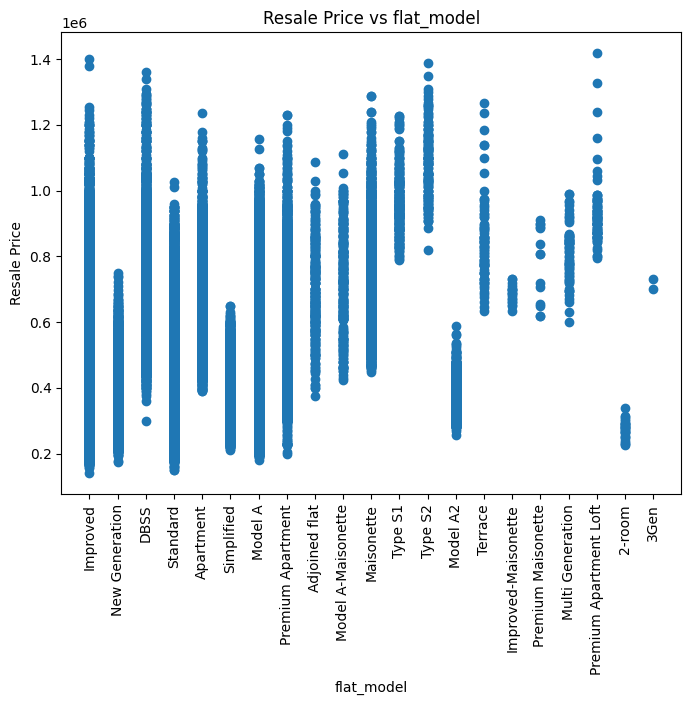

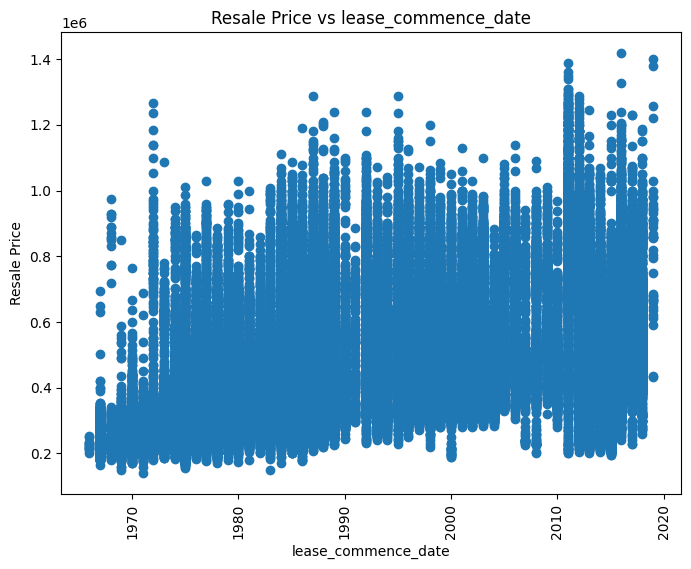

In [29]:
#Exploratory data analysis against the price column
import pandas as pd
import matplotlib.pyplot as plt

# Perform exploratory data analysis on each column against 'price'
for column in df.columns:
    if column == 'resale_price':
        continue

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['resale_price'])
    plt.xlabel(column)
    plt.ylabel('Resale Price')
    plt.title(f"Resale Price vs {column}")
    plt.xticks(rotation=90)  # Rotate x-axis labels

    plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Perform data preprocessing
label_encoder = LabelEncoder()
df['town'] = label_encoder.fit_transform(df['town'])
df['flat_model'] = label_encoder.fit_transform(df['flat_model'])
df['flat_type'] = label_encoder.fit_transform(df['flat_type'])
df['storey_range'] = label_encoder.fit_transform(df['storey_range'])

# Prepare the features and target
X = df.drop('resale_price', axis=1)
y = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_y_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_y_pred)

# Create and train the Random Forest Regression model
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_y_pred = random_forest_reg.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_y_pred)

# Create and train the XGBoost Regression model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_y_pred = xgb_reg.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

# Print the mean squared errors for each model
print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Random Forest Regression Mean Squared Error:", random_forest_mse)
print("XGBoost Regression Mean Squared Error:", xgb_mse)

# Determine the model with the least error
min_mse = min(linear_reg_mse, random_forest_mse, xgb_mse)

if min_mse == linear_reg_mse:
    print("Linear Regression has the least error.")
elif min_mse == random_forest_mse:
    print("Random Forest Regression has the least error.")
else:
    print("XGBoost Regression has the least error.")


Linear Regression Mean Squared Error: 11458730989.504416
Random Forest Regression Mean Squared Error: 2588122689.54033
XGBoost Regression Mean Squared Error: 2358734230.377898
XGBoost Regression has the least error.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare the features and target
X = df.drop('resale_price', axis=1)
y = df['resale_price']

# Define preprocessing steps for categorical columns
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['town'])],
    remainder='passthrough'
)

# Create the pipeline with preprocessing and Random Forest Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Function to predict resale price given a town name
def predict_resale_price(town_name):
    # Prepare the input data
    town_data = pd.DataFrame({'town': [town_name]})

    # Predict the resale price
    price_pred = pipeline.predict(town_data)
    return price_pred[0]

# Example usage: predict resale price for a town
town = input("Enter a town name: ")
estimated_price = predict_resale_price(town)
print(f"Estimated resale price for {town}: {estimated_price}")
